In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving date.csv to date.csv
Saving profitability.csv to profitability.csv


In [ ]:
df1 = pd.read_csv('/content/profitability.csv', encoding='cp1252', sep=';')

In [ ]:
df1.head()

ProduitFk  CustomerFk  StoreFk  TransactionDate  StatmentDate TotalAssets  \
0          1        3470        1             5559          5559   381164,00   
1          2        4566        2            18750         18750   240319,00   
2          3        5756        3            38945         38945   294791,00   
3          4        2350        4             9235          9235   190521,00   
4          5        3547        5             5628          5628   425666,00   

  TotalLiabilities     Equity    Budget ActualExpenses   Amount  Quantity  \
0         59281,00  321883,00  28886,00       20784,00  4636,00         7   
1         17565,00  222754,00  42222,00       17879,00  4721,00         8   
2         35691,00  259100,00  24755,00       10480,00   507,00         6   
3         25545,00  164976,00  28149,00       14191,00  4863,00         3   
4         24040,00  401626,00  47232,00       19283,00   854,00         5   

  UnitPrice TotalPrice  
0     87,18     610,26  
1     89,93     719,44  
2     17,97     107,82  
3     38,71     116,13  
4     25,72     128,60

In [ ]:
df2 = pd.read_csv('/content/date.csv', encoding='cp1252', sep=';')

In [ ]:
df2.head()

DisputeDate  DateFk
0  2015-01-24       1
1  2015-01-24       2
2  2015-01-26       3
3  2015-01-27       4
4  2015-01-27       5

In [ ]:
print(df1.shape)
print(df2.shape)

(656, 14)
(39700, 2)


In [ ]:
# Jointure interne sur les colonnes 'DateFk' de df1 et 'StatmentDate' de df2
df = pd.merge(df1, df2, left_on='StatmentDate', right_on='DateFk', how='inner')

In [ ]:
print(df.shape)

(656, 16)


In [ ]:
df.head( )

ProduitFk  CustomerFk  StoreFk  TransactionDate  StatmentDate TotalAssets  \
0          1        3470        1             5559          5559   381164,00   
1          2        4566        2            18750         18750   240319,00   
2          3        5756        3            38945         38945   294791,00   
3          4        2350        4             9235          9235   190521,00   
4          5        3547        5             5628          5628   425666,00   

  TotalLiabilities     Equity    Budget ActualExpenses   Amount  Quantity  \
0         59281,00  321883,00  28886,00       20784,00  4636,00         7   
1         17565,00  222754,00  42222,00       17879,00  4721,00         8   
2         35691,00  259100,00  24755,00       10480,00   507,00         6   
3         25545,00  164976,00  28149,00       14191,00  4863,00         3   
4         24040,00  401626,00  47232,00       19283,00   854,00         5   

  UnitPrice TotalPrice DisputeDate  DateFk  
0     87,18     610,26  2020-04-19    5559  
1     89,93     719,44  2022-07-30   18750  
2     17,97     107,82  2025-01-05   38945  
3     38,71     116,13  2020-12-05    9235  
4     25,72     128,60  2020-04-23    5628

In [ ]:
# Sélectionner uniquement les colonnes 'DisputeDate' et 'budget'
data= df[['DisputeDate', 'Budget']]


In [ ]:
# Renommer la colonne 'DisputeDate' en 'StatementDate'
data = data.rename(columns={'DisputeDate': 'StatementDate'})

In [ ]:
print(data)

    StatementDate    Budget
0      2020-04-19  28886,00
1      2022-07-30  42222,00
2      2025-01-05  24755,00
3      2020-12-05  28149,00
4      2020-04-23  47232,00
..            ...       ...
651    2023-09-15  35574,00
652    2021-10-08  22121,00
653    2021-04-07  28481,00
654    2024-01-12  27185,00
655    2023-03-13  42990,00

[656 rows x 2 columns]


In [ ]:
# Triez les données par date (important pour la série temporelle)
data = data.sort_values('StatementDate')

In [ ]:
print(data)

    StatementDate    Budget
276    2019-07-26  47766,00
100    2019-07-28  15712,00
169    2019-07-31  46473,00
107    2019-08-01  39279,00
643    2019-08-04  38479,00
..            ...       ...
316    2024-12-27  29588,00
362    2025-01-04  19041,00
2      2025-01-05  24755,00
298    2025-01-06  28492,00
83     2025-01-09  19766,00

[656 rows x 2 columns]


In [ ]:
df = pd.DataFrame(data)

# Sauvegarder dans un fichier CSV
df.to_csv("budget_data.csv", index=False)

In [ ]:
# Convertir 'StatementDate' en datetime
data['StatementDate'] = pd.to_datetime(data['StatementDate'])

# Nettoyer et convertir 'Budget' en float (enlever la virgule)
data['Budget'] = data['Budget'].str.replace(',', '.').astype(float)
# Définir 'StatementDate' comme index
data.set_index('StatementDate', inplace=True)



In [ ]:
print(data.head())


                Budget
StatementDate         
2019-07-26     47766.0
2019-07-28     15712.0
2019-07-31     46473.0
2019-08-01     39279.0
2019-08-04     38479.0


In [ ]:
# Sélectionner la variable Budget à prédire
budget_data = data['Budget']


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

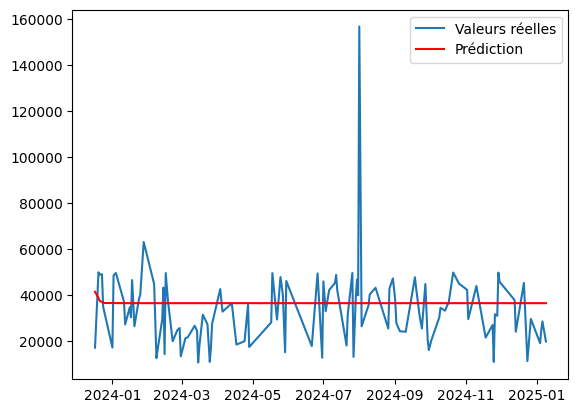

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Séparer les données en train et test (80% train, 20% test)
train_size = int(0.8 * len(data))
train, test = data['Budget'][:train_size], data['Budget'][train_size:]

# Ajuster un modèle ARIMA
model = ARIMA(train, order=(1,1,1))  # Paramètres à ajuster selon les résultats
model_fit = model.fit()

# Prédiction sur la période de test
forecast = model_fit.forecast(steps=len(test))

# Visualiser les résultats
plt.plot(test.index, test, label="Valeurs réelles")
plt.plot(test.index, forecast, label="Prédiction", color='red')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 11307.56226881411


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-pack

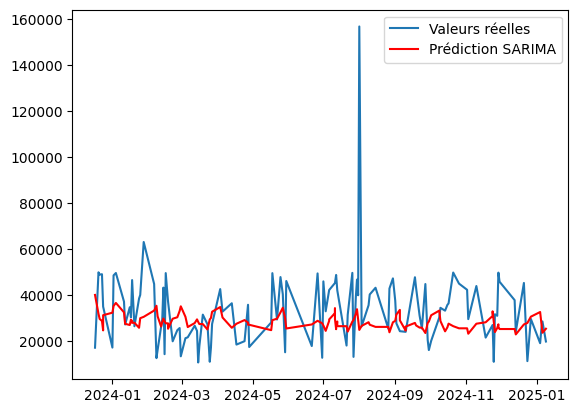

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Séparer les données en train et test (80% train, 20% test)
train_size = int(0.8 * len(data))
train, test = data['Budget'][:train_size], data['Budget'][train_size:]

# Ajuster un modèle SARIMA (en supposant une saisonnalité mensuelle, donc s=12)
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()

# Prédiction sur la période de test
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

# Visualiser les résultats
plt.plot(test.index, test, label="Valeurs réelles")
plt.plot(test.index, forecast_sarima, label="Prédiction SARIMA", color='red')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-pack

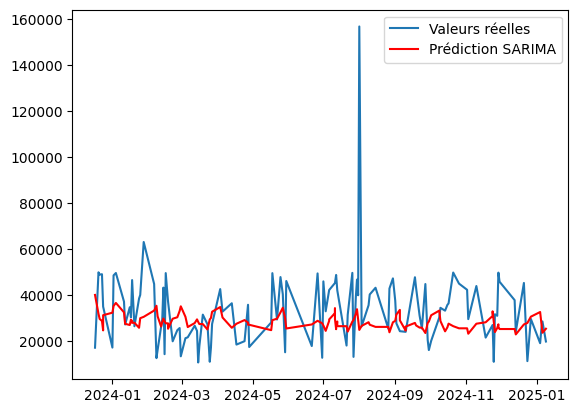

Mean Absolute Error (MAE): 12247.371249222537


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Séparer les données en train et test (80% train, 20% test)
train_size = int(0.8 * len(data))
train, test = data['Budget'][:train_size], data['Budget'][train_size:]

# Ajuster un modèle SARIMA (p, d, q) x (P, D, Q, s)
# P, D, Q sont les paramètres saisonniers, s est la fréquence saisonnière (ex: 12 mois pour des données mensuelles)
model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit_sarima = model_sarima.fit()

# Prédiction sur la période de test
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

# Visualiser les résultats
plt.plot(test.index, test, label="Valeurs réelles")
plt.plot(test.index, forecast_sarima, label="Prédiction SARIMA", color='red')
plt.legend()
plt.show()

# Évaluation du modèle
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, forecast_sarima)


print(f"Mean Absolute Error (MAE): {mae}")



In [ ]:
print(data.index[-1])


2025-01-09 00:00:00


In [ ]:
# Obtenir la dernière valeur de budget et sa date
last_row = data.iloc[-1]  # Récupère la dernière ligne du DataFrame
last_budget = last_row['Budget']  # Dernier budget
last_date = last_row.name  # Date correspondante à la dernière ligne (index est 'StatementDate')

# Afficher le résultat
print(f"Le dernier budget est {last_budget} et sa date est {last_date}")


Le dernier budget est 19766.0 et sa date est 2025-01-09 00:00:00


In [ ]:
# Générer les dates futures (en supposant que les dates sont journalières)
last_date = data.index.max()  # Dernière date dans le dataset
future_dates = pd.date_range(last_date, periods=future_steps+1, freq='D')[1:]  # +1 pour ne pas inclure la dernière date

# Créer un DataFrame avec les prévisions et les dates futures
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Budget': forecast})

# Affichage des prévisions futures
print(forecast_df)

          Date  Predicted Budget
524 2025-01-10      41394.545603
525 2025-01-11      38682.424239
526 2025-01-12      37454.946847
527 2025-01-13      36899.403586
528 2025-01-14      36647.970592
529 2025-01-15      36534.174684
530 2025-01-16      36482.671861
531 2025-01-17      36459.362230
532 2025-01-18      36448.812537
533 2025-01-19      36444.037858
534 2025-01-20      36441.876889
535 2025-01-21      36440.898857
536 2025-01-22      36440.456211
537 2025-01-23      36440.255873
538 2025-01-24      36440.165203
539 2025-01-25      36440.124166
540 2025-01-26      36440.105594
541 2025-01-27      36440.097188
542 2025-01-28      36440.093383
543 2025-01-29      36440.091662
544 2025-01-30      36440.090882
545 2025-01-31      36440.090530
546 2025-02-01      36440.090370
547 2025-02-02      36440.090298
548 2025-02-03      36440.090265
549 2025-02-04      36440.090250
550 2025-02-05      36440.090244
551 2025-02-06      36440.090241
552 2025-02-07      36440.090239
553 2025-0

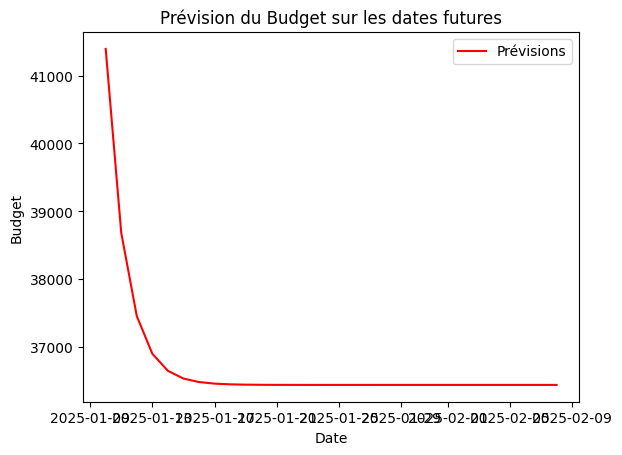

In [ ]:
# Visualiser les résultats : uniquement les prévisions pour les dates futures
plt.plot(forecast_df['Date'], forecast_df['Predicted Budget'], label="Prévisions", color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Budget')
plt.title('Prévision du Budget sur les dates futures')
plt.show()  # Affichage des prévisions futures
